# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Versa Syahputra Santo
- **Email:** versa1220@gmail.com
- **ID Dicoding:** versa-syahptr

## Menentukan Pertanyaan Bisnis

1. Pada waktu apa pengguna lebih banyak meminjam sepeda?  `Dini hari, Pagi, Siang, Sore, Malam`
    - Dini hari &nbsp;:   `00.00 - 04.59`
    - Pagi &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; : `05.00 - 10.59`
    - Siang &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: `11.00 - 14.59`
    - Sore &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: `15.00 - 18.59`
    - Malam &nbsp;&nbsp;&nbsp;&nbsp;: `19.00 - 23.59`
1. Pada cuaca apa pengguna lebih banyak meminjam sepeda? `Cerah, Mendung, Hujan Ringan, Hujan Deras`

## Import Semua Packages/Library yang Digunakan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Dataset ini memiliki dua jenis _record_. Yang pertama adalah _record_ peminjaman sepeda per-hari (`day.csv`) dan yang kedua adalah _record_ peminjaman sepeda per-jam (`hour.csv`). 

In [8]:
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [9]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Mencari missing value pada data

In [11]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa tidak ada data yang missing pada kedua dataset

#### Mencari duplicated data

In [13]:
df_hour.duplicated().sum()

0

In [14]:
df_day.duplicated().sum()

0

Terlihat bahwa tidak ada data yang duplikat pada kedua dataset

#### Mencari outlier

Mencari outlier pada kolom yang bertipe data kontinu seperti `temp`, `atemp`, `hum`, dan `windspeed`

In [15]:
# fungsi untuk mendapatkan outlier dari dataframe berdasarkan kolom yang diinginkan
def get_outlier(df: pd.DataFrame, columns: list):
    indices = set()
    for column in columns:
        column = df[column]
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        min_range = q1 - 1.5 * iqr
        max_range = q3 + 1.5 * iqr
        outliers = column[(column < min_range) | (column > max_range)]
        print(f"Outliers [{column.name.center(10)}] = {len(outliers):5d}")
        indices = indices.union(outliers.index)
    print(f"Total Outliers\t= {len(indices):5d}".expandtabs(22))
    return df.loc[list(indices)].sort_index()


Outlier pada data `df_hour`

In [16]:
df_hour_outlier = get_outlier(df_hour, ['temp', 'atemp', 'hum', 'windspeed'])
df_hour_outlier

Outliers [   temp   ] =     0
Outliers [  atemp   ] =     0
Outliers [   hum    ] =    22
Outliers [windspeed ] =   342
Total Outliers        =   363


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


Outlier pada data `df_day`

In [17]:
df_day_outlier = get_outlier(df_day, ['temp', 'atemp', 'hum', 'windspeed'])
df_day_outlier

Outliers [   temp   ] =     0
Outliers [  atemp   ] =     0
Outliers [   hum    ] =     2
Outliers [windspeed ] =    13
Total Outliers        =    14


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,4,0,10,0,4,1,1,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,1,1,1,0,3,1,1,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382


### Cleaning Data

Karena tidak ada data yang duplikat, maka data hanya akan dibersihkan dari outlier

In [18]:
# cek presentase outlier terhadap total data
print(f"Presentase Outlier Hour = {len(df_hour_outlier) / len(df_hour) * 100:.2f}%")
print(f"Presentase Outlier Day  = {len(df_day_outlier) / len(df_day) * 100:.2f}%")

Presentase Outlier Hour = 2.09%
Presentase Outlier Day  = 1.92%


karena presentase outlier terhadap total data cukup kecil, maka semua outlier akan di `drop()`

In [19]:
df_hour.drop(df_hour_outlier.index, inplace=True)
df_day.drop(df_day_outlier.index, inplace=True)

print(f"Total Data Hour = {len(df_hour)}")
print(f"Total Data Day  = {len(df_day)}")

Total Data Hour = 17016
Total Data Day  = 717


## Exploratory Data Analysis (EDA)

### Explore Parameter Statistik dari Data

In [20]:
df_hour.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17016.000000,17016,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.636460,2012-01-03 09:56:31.819464192,2.516396,0.502997,6.572873,11.503996,0.028914,2.998002,0.682769,1.422308,0.498235,0.477199,0.630960,0.182814,35.784262,154.048895,189.833157
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2011-07-06 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8697.500000,2012-01-03 00:00:00,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.635000,0.164200,17.000000,116.000000,142.000000
75%,13075.250000,2012-07-03 06:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,48.250000,221.000000,282.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000
std,5009.380243,NaN,1.103448,0.500006,3.427822,6.933561,0.167570,2.005194,0.465412,0.635204,0.192770,0.171556,0.190498,0.112016,49.419374,151.680591,181.762553


In [21]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,717.000000,717,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,366.779637,2012-01-01 18:42:40.669455872,2.51325,0.499303,6.562064,0.029289,2.995816,0.684798,1.396095,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
min,1.000000,2011-01-01 00:00:00,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2011-07-04 00:00:00,2.00000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,365.000000,2011-12-31 00:00:00,3.00000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,550.000000,2012-07-03 00:00:00,3.00000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,731.000000,2012-12-31 00:00:00,4.00000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,210.971354,NaN,1.10555,0.500349,3.439113,0.168732,2.001741,0.464921,0.543511,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429


### Penggabungan Data

#### Menggabungkan data berdasarkan cuaca

In [38]:
weather_day = df_day.groupby(by="weathersit")["cnt"].mean()
weather_day

weathersit
1    4915.602649
2    4041.127049
3    1862.300000
Name: cnt, dtype: float64

In [36]:
weather_hour = df_hour.groupby(by="weathersit")["cnt"].mean()
weather_hour

weathersit
1    205.235068
2    174.703414
3    112.598665
4     74.333333
Name: cnt, dtype: float64

#### Menggabungkan data berdasarkan waktu

Step:
- Menghitung rata-rata peminjaman per-jam pada setiap hari dari data `df_hour`
- Mengabungkan dan menjumlahkan hasil rata-rata tersebut sesuai standar pembagian waktu

In [54]:
# standar waktu
WAKTU = {
    "Dini Hari": slice(0, 5), # 00:00 - 04:59
    "Pagi": slice(5, 11),     # 05:00 - 10:59
    "Siang": slice(11, 15),   # 11:00 - 14:59
    "Sore": slice(15, 19),    # 15:00 - 18:59
    "Malam": slice(19, 24)    # 19:00 - 23:59
}

In [57]:
mean_hourly = df_hour.groupby(by="hr")["cnt"].mean()
total_per_waktu = {}
for waktu, jam in WAKTU.items():
    total_per_waktu[waktu] = mean_hourly[jam].sum()
total_per_waktu

{'Dini Hari': 128.78253232718444,
 'Pagi': 1064.1404444821449,
 'Siang': 964.2605252310238,
 'Sore': 1462.7765468629404,
 'Malam': 937.9892971486196}

## Visualization & Explanatory Analysis

### Pertanyaan 1:

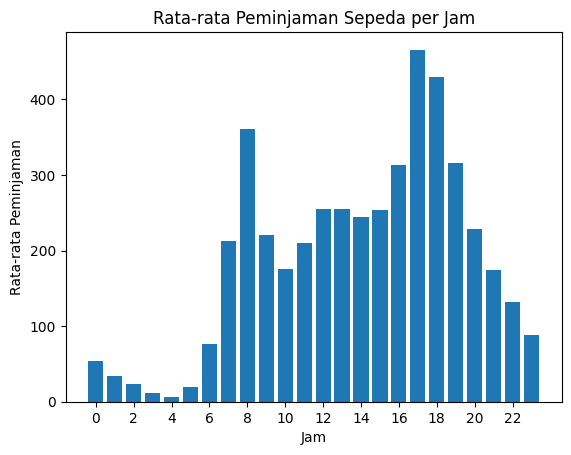

In [58]:
plt.bar(mean_hourly.index, mean_hourly.values)
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.xlabel("Jam")
plt.xticks(range(0, 24, 2))
plt.show()

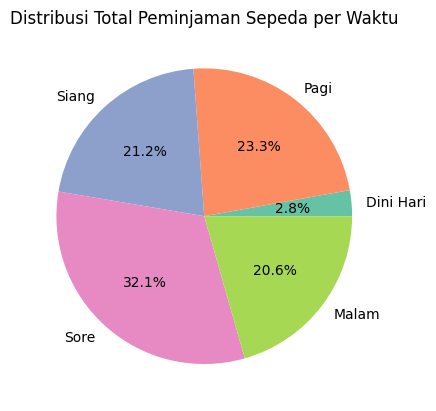

In [59]:
plt.pie(total_per_waktu.values(), 
        labels=total_per_waktu.keys(), 
        autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Distribusi Total Peminjaman Sepeda per Waktu')
plt.show()

### Pertanyaan 2:

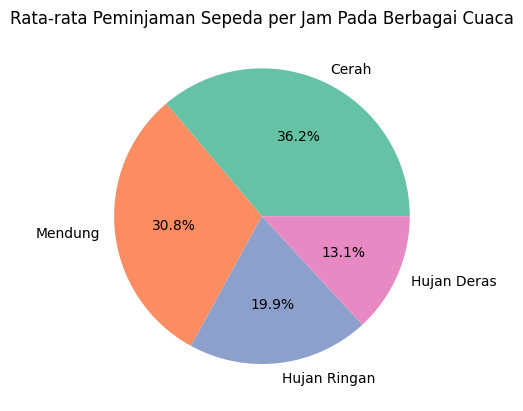

In [45]:
CUACA = ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Deras']
plt.pie(weather_hour, labels=CUACA, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Rata-rata Peminjaman Sepeda per Jam Pada Berbagai Cuaca')
plt.show()

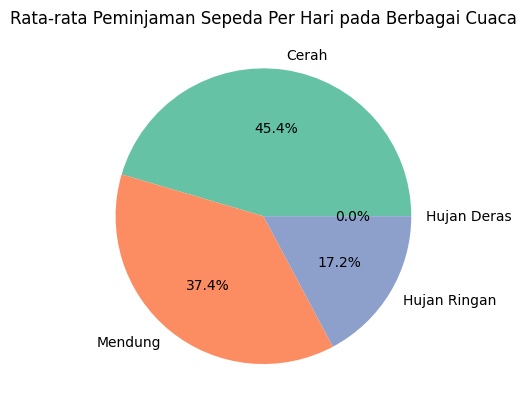

In [46]:
weather_day.loc[4] = 0 
plt.pie(weather_day, labels=CUACA, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Rata-rata Peminjaman Sepeda Per Hari pada Berbagai Cuaca')
plt.show()

## Conclusion

- Berdasarkan grafik `Distribusi Total Peminjaman Sepeda per Waktu`, dikatakan bahwa pengguna lebih banyak meminjam sepeda pada **sore hari** (32.1%) dan **pagi hari** (23.3%)
- Berdasarkan grafik `Rata-rata Peminjaman Sepeda per Jam Pada Berbagai Cuaca` dan `Rata-rata Peminjaman Sepeda per Hari Pada Berbagai Cuaca`, dapat dilihat bahwa pengguna lebih banyak meminjam sepeda pada cuaca **Cerah**